In [3]:
%%time
import manager_dataset as MD
import question_processing as QP
import information_retrieval as IR
from gensim.models import KeyedVectors

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Wall time: 6.37 s


### Settings

questions recive all the questions treated

In [2]:
questions = MD.questions(treated=True)
questions = QP.remove_incosiderate_classes(questions)  # Question with incosiderate class is removed

The questions that has an answer will be used for test while another questions will be used for train.

In [3]:
train_questions, test_questions = MD.split_questions(questions)

## Question Processing

### Question Classification

Questions to train and test

In [4]:
qc_X_train, qc_y_train = QP.separete_questions(train_questions)

Load Word2Vec model

In [5]:
%%time
w2v_patch = 'data/word_embedding/cbow_s300.txt'
w2v_patch = 'data/word_embedding/cbow_s50.txt'  # Fast test
w2v = KeyedVectors.load_word2vec_format(w2v_patch, unicode_errors="ignore")
model_w2v = {w: vec for w, vec in zip(w2v.index2word, w2v.syn0)}

Wall time: 38.7 s


Training

In [6]:
%%time
classifier = QP.svm_classifier()
vectorizer = QP.HybridVectorizer(model_w2v)
#vectorizer = QP.MeanEmbeddingVectorizer(model_w2v)
#vectorizer = QP.TfidfHybridVectorizer(model_w2v)
#vectorizer = QP.SequenceHybridVectorizer(model_w2v)
#vectorizer = QP.count_vectorizer(model_w2v)
#vectorizer = QP.tfidf_vectorizer(model_w2v)
model = QP.train_model(qc_X_train, qc_y_train, classifier, vectorizer)

Wall time: 411 ms


Answer type is predicted for all questions

In [7]:
questions = QP.predict_answer_type(model, test_questions)

#### Testing

In [8]:
qc_X_test, qc_y_test = QP.separete_questions(test_questions)
print('Size train:',len(qc_y_train),'  Size test:',len(qc_y_test))

Size train: 2147   Size test: 826


Accuracy: 0.889830508475
F1 Score: 0.880864987979


<IPython.core.display.Javascript object>


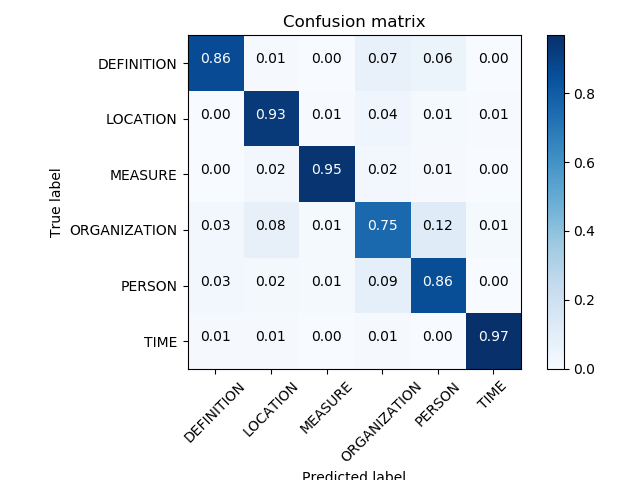

In [9]:
%matplotlib notebook
confusion_matrix = QP.testing(model, qc_X_test, qc_y_test)
QP.plot_confusion_matrix(confusion_matrix, ['DEFINITION', 'LOCATION', 'MEASURE', 'ORGANIZATION', 'PERSON', 'TIME'], normalize=True)

## Information Retrieval

### Document Retrieval

In [2]:
import information_retrieval as IR
ir = IR.InformationRetrieval()

In [5]:
ir.start()

In [3]:
ir.stop()